# Neural Network

Our third and last model evaluated in the task of Fetal Health Classification is a Neural Network. We use the TensorFlow library to develop this model.

### Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import CategoricalAccuracy, F1Score, Recall
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold
import pyprojroot
import pickle

We set a random seed for reproducibility.

In [2]:
RANDOM_STATE = 11

## 1. Data Preprocessing

In [3]:
DATA_PATH = pyprojroot.here().joinpath('data', 'fetal_health.csv')
df = pd.read_csv(DATA_PATH)

In [4]:
df['fetal_health'] = df['fetal_health']-1

In [5]:
# Split data into train, test and validation sets
train, validate, test = np.split(df.sample(frac=1, random_state=RANDOM_STATE), [int(.7*len(df)), int(.8*len(df))])

/home/joselier/miniconda3/envs/capstone-project/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
X_train = train[df.columns.difference(['fetal_health', 'fetal_health_label'])]
y_train = train['fetal_health']

X_test = test[df.columns.difference(['fetal_health', 'fetal_health_label'])]
y_test = test['fetal_health']

X_val = validate[df.columns.difference(['fetal_health', 'fetal_health_label'])]
y_val = validate['fetal_health']

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.fit_transform(X_val)

In [8]:
# One-hot encode our target variable
num_classes = len(df['fetal_health'].unique())
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

## 2. Model Training

In [74]:
model = Sequential()

# layer 1
model.add(Dense(128, 
    kernel_regularizer=regularizers.l2(1e-4),
    input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

# layer 2
model.add(Dense(64, 
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
          
# layer 3
model.add(Dense(32, 
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
          
# Classification
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

/home/joselier/miniconda3/envs/capstone-project/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,147 (55.26 KB)

 Trainable params: 13,699 (53.51 KB)

 Non-trainable params: 448 (1.75 KB)

In [75]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(),
             metrics=[
                 CategoricalAccuracy(),
                 Recall(average='macro', name='balanced_accuracy'),
                 Recall(class_id=2, name='recall_2'),
                 F1Score(average='macro')
             ])

In [76]:
MODEL_PATH = pyprojroot.here().joinpath('models', 'neural_net.keras')

# Defining our callbacks
checkpoint = ModelCheckpoint(MODEL_PATH, 
                             verbose=1,
                            save_best_only=True,
                            monitor='val_recall',
                            mode='max')

In [77]:
hist = model.fit(X_train_scaled, y_train,
                callbacks=[checkpoint],
                epochs=120,
                validation_data=(X_val_scaled, y_val))

Epoch 1/120


37/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.4344 - f1_score: 0.3555 - loss: 1.3200 - recall: 0.3559 
Epoch 1: val_recall improved from -inf to 0.13043, saving model to /home/joselier/capstone-fuse.ai/models/neural_net.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - categorical_accuracy: 0.4564 - f1_score: 0.3719 - loss: 1.2777 - recall: 0.3691 - val_categorical_accuracy: 0.6981 - val_f1_score: 0.5637 - val_loss: 0.9365 - val_recall: 0.1304
Epoch 2/120
35/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.7481 - f1_score: 0.5971 - loss: 0.7406 - recall: 0.6372
Epoch 2: val_recall improved from 0.13043 to 0.65217, saving model to /home/joselier/capstone-fuse.ai/models/neural_net.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - categorical_accuracy: 0.7530 - f1_score: 0.6068 - loss: 0.7317 - recall: 0.6512 - val_categorical_accuracy: 0.8868 - val_f1_score: 0.7840 - val_loss: 0.6632 - val_recall: 0.6522
Epoch 3/120
39/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - cate

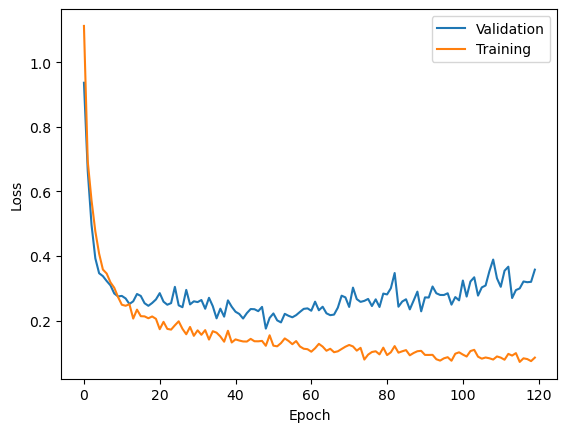

In [78]:
fig, ax = plt.subplots(1, 1)

train_val = hist.history['val_loss']
ax.plot(range(len(train_val)), hist.history['val_loss'])
ax.plot(range(len(train_val)), hist.history['loss'])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Validation', 'Training'], loc='best')

plt.show()

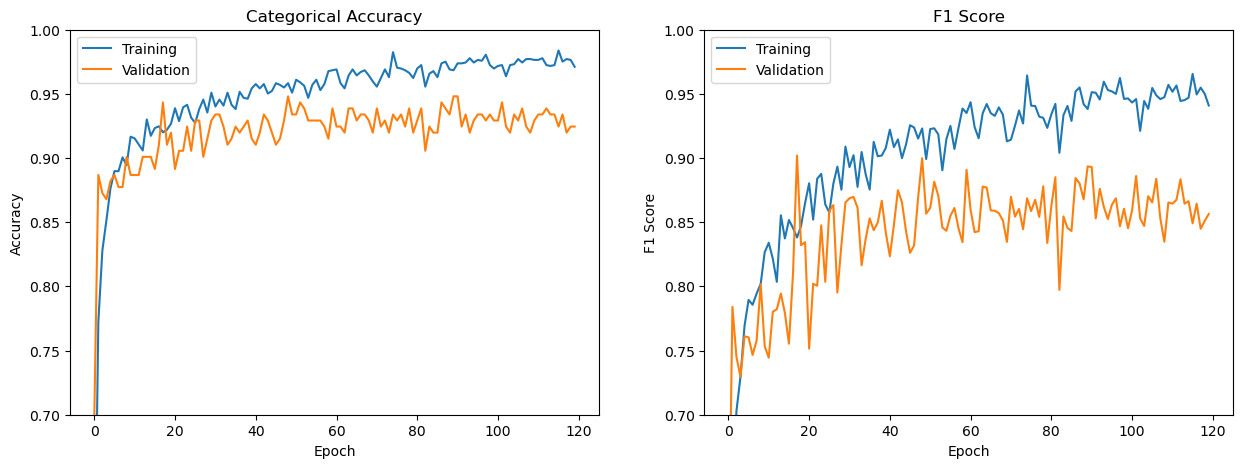

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

train_val = hist.history['val_f1_score']
ax[0].set_ylim([0.7,1])
ax[0].plot(range(len(train_val)), hist.history['categorical_accuracy'])
ax[0].plot(range(len(train_val)), hist.history['val_categorical_accuracy'])
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Categorical Accuracy')
ax[0].legend(['Training', 'Validation'], loc='best')

ax[1].set_ylim([0.7,1])
ax[1].plot(range(len(train_val)), hist.history['f1_score'])
ax[1].plot(range(len(train_val)), hist.history['val_f1_score'])
ax[1].set_ylabel('F1 Score')
ax[1].set_xlabel('Epoch')
ax[1].set_title('F1 Score')
ax[1].legend(['Training', 'Validation'], loc='best')

plt.show()

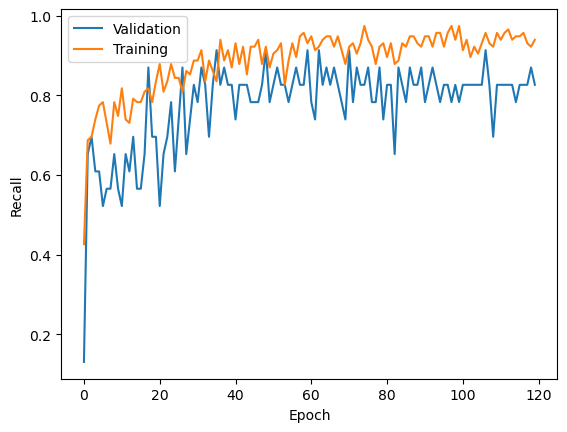

In [80]:
fig, ax = plt.subplots(1, 1)

train_val = hist.history['val_f1_score']
ax.plot(range(len(train_val)), hist.history['val_recall'])
ax.plot(range(len(train_val)), hist.history['recall'])
ax.set_ylabel('Recall')
ax.set_xlabel('Epoch')
ax.legend(['Validation', 'Training'], loc='best')

plt.show()

## 3. Evaluation

In [81]:
best_nn = load_model(MODEL_PATH)

In [82]:
best_nn.evaluate(X_test_scaled, y_test, return_dict=True)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9429 - f1_score: 0.9019 - loss: 0.1827 - recall: 0.9608


{'categorical_accuracy': 0.9389671087265015,
 'f1_score': 0.8806700110435486,
 'loss': 0.19545574486255646,
 'recall': 0.9210526347160339}